# Multiple Linear Regression

### Linear Regression Theory
The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points

This same concept can be extended to cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of the house based upon its area, number of bedrooms, the average income of the people in the area, the age of the house, and so on. In this case, the dependent variable(target variable) is dependent upon several independent variables. A regression model involving multiple variables can be represented as:
##### y = b0 + m1b1 + m2b2 + m3b3 + … … mnbn

This is the equation of a hyperplane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyperplane.

Here we are considering "50_Startups" dataset. 
Here Profit (dependent feature ) is based on all the other independent features ( R&D , Administration , Marketing spend and State)
So we need to predict Profit based on the other independent features

In [24]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.shape

(50, 5)

In [5]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# To check if there are any null values
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

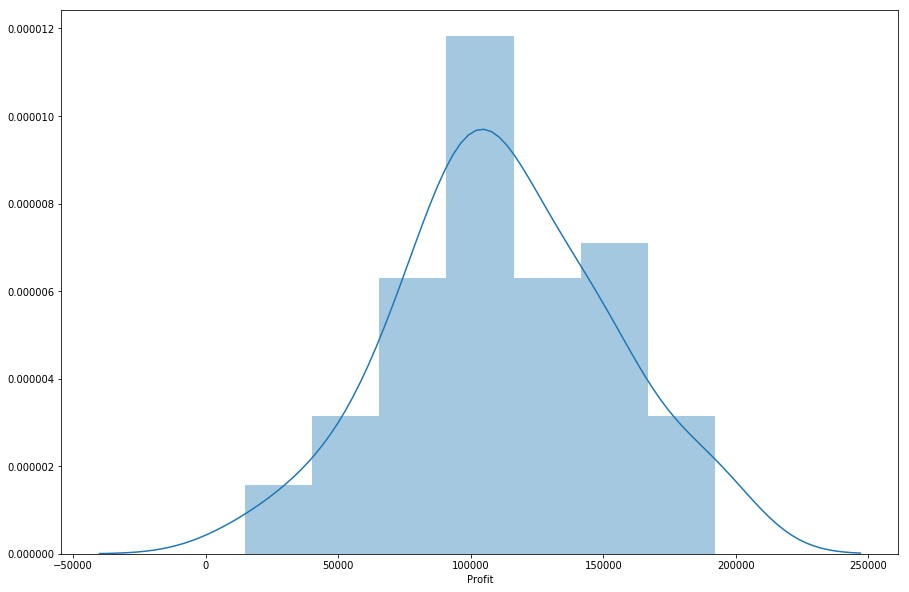

In [8]:
#Let's check the average value of the “quality” column.
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['Profit'])

We can observe that most of the time the value is centered around 100000

### Feature Engineering
#### One hot encoding -dummy variable trap 

Convert the "States" column into categorical columns through one hot encoding by using "get_dummies"  and drop the first column
(California, New York and Florida - 3 categorical features)
Encoding through one hot encoding results in dummy variable trap so we need to take care of this.

If there were only 2 labels , we would have used Label encoding


In [10]:
states=pd.get_dummies(X['State'],drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [11]:
# Drop the state column after dividing into one hot encoded variables or dummy variables
X=X.drop('State',axis=1)

In [12]:
#concatenation of the dummy variables
X=pd.concat([X,states], axis=1)

In [13]:
# State column is dropped
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


Here we have 5 diff coefficients 
b1= R&D , b2= Administration , b3= Marketing Spend , b4= Florida , b5= New York and one intercept b0.

So our multiple linear regression becomes y= b0 + b1x1 +b2x2 +b3x3 +b4x4 +b5x5


##### TRAIN TEST SPLIT

In [14]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=0)

In [15]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [16]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
R&D Spend,0.773467
Administration,0.032885
Marketing Spend,0.036610
Florida,-959.284160
New York,699.369053


This means that for a unit increase in “R&D Spend”, there is a increase of 0.77 units in the profit.     
Similarly, a unit  increase in “Administration“ results in an increase of 0.032 units  in the profit of the start up. 

In [17]:
# Predicting the Test set results

ypred=regressor.predict(X_test)

In [21]:
# Check the difference between the actual value and predicted value.
df=pd.DataFrame({'Actual':y_test , 'Predicted' : ypred})
df.head(10)

,Actual,Predicted
28,103282.38,103015.201598
11,144259.40,132582.277608
10,146121.95,132447.738452
41,77798.83,71976.098513
2,191050.39,178537.482211
27,105008.31,116161.242302
38,81229.06,67851.692097
31,97483.56,98791.733747
22,110352.25,113969.435330
4,166187.94,167921.065696


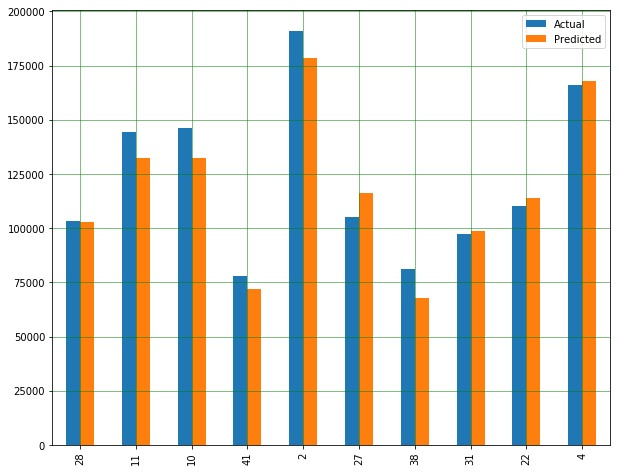

In [20]:
# let's plot the comparison of Actual and Predicted values

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### R-square - Comparing y_test and ypred if the accuracy is good or not
Ranges from 0 to 1;   
R2 = 1.0 - (SSres/SSmean);     
R2= (SSmean-SSres) / SSmean;  
SSres=Average of  Summation of ( y- y')^2;  
SSmean= Average of  Summation of ( y- ymean) ^2

Note : SSmean > SSres  ( if our model is good)

In [ ]:
# Comparing y_test and ypred if the accuracy is good or not 
from sklearn.metrics import r2_score
score=r2_score(y_test,ypred)
print ("The R2 score is :",score)

As R2 score is very very nearer to 1 , our model is good

The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE

In [26]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 7514.293659640607
Mean Squared Error: 83502864.03257747
Root Mean Squared Error: 9137.99015279495
